In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [15]:
# Read the CSV file into a pandas DataFrame
df = pd.read_csv('SentAnalysis_idioms.csv')

In [17]:
df.head(1)

,Idiom,Meaning,eng_sadness,eng_joy,eng_love,eng_anger,eng_fear,eng_surprise,spa_sadness,spa_joy,spa_love,spa_anger,spa_fear,spa_surprise
0,"A buen hambre, no hay pan duro.",Beggars can’t be choosers.,0.011603,0.002736,0.000632,0.980289,0.004451,0.000288,0.021514,0.119736,0.005086,0.836498,0.01541,0.001756


## Note: the sentiments within each language are relative: in each sample the values add up to 1.0 for Spanish and for English.

In [4]:
ordered_columns = ['eng_sadness', 'spa_sadness', 
                   'eng_joy', 'spa_joy', 
                   'eng_love', 'spa_love', 
                   'eng_anger', 'spa_anger', 
                   'eng_fear', 'spa_fear', 
                   'eng_surprise', 'spa_surprise']

# Create a new DataFrame with the columns reordered
df = df[ordered_columns]
df.head()

,eng_sadness,spa_sadness,eng_joy,spa_joy,eng_love,spa_love,eng_anger,spa_anger,eng_fear,spa_fear,eng_surprise,spa_surprise
0,0.011603,0.021514,0.002736,0.119736,0.000632,0.005086,0.980289,0.836498,0.004451,0.015410,0.000288,0.001756
1,0.119516,0.035885,0.031524,0.668664,0.025592,0.013412,0.770668,0.225836,0.046732,0.049863,0.005969,0.006340
2,0.090105,0.013020,0.009540,0.893818,0.002397,0.006894,0.869479,0.062987,0.027009,0.020650,0.001470,0.002632
3,0.001021,0.030938,0.003644,0.639629,0.989614,0.014984,0.001817,0.248228,0.001617,0.059439,0.002287,0.006782
4,0.074329,0.039221,0.271634,0.289112,0.037179,0.012358,0.604694,0.633659,0.010450,0.020962,0.001714,0.004687


In [5]:
# Find the index of the maximum sentiment score for each row for English sentiments
df['eng_highest_sent'] = df[['eng_sadness', 'eng_joy', 'eng_love', 'eng_anger', 'eng_fear', 'eng_surprise']].idxmax(axis=1)

# Find the index of the maximum sentiment score for each row for Spanish sentiments
df['spa_highest_sent'] = df[['spa_sadness', 'spa_joy', 'spa_love', 'spa_anger', 'spa_fear', 'spa_surprise']].idxmax(axis=1)

In [6]:
# Remove the prefix "eng_" from each entry in the 'eng_highest_sent' column
df['eng_highest_sent'] = df['eng_highest_sent'].str.replace('eng_', '')

# Remove the prefix "spa_" from each entry in the 'spa_highest_sent' column
df['spa_highest_sent'] = df['spa_highest_sent'].str.replace('spa_', '')

# Calculate the number of matching values
matching_count = (df['eng_highest_sent'] == df['spa_highest_sent']).sum()

top_emotion_accuracy = matching_count/df.shape[0]*100
print(np.round(top_emotion_accuracy),"% of the idioms have the same top-ranked emotion in each language.")

43.0 % of the idioms have the same top-ranked emotion in each language.


## It's surprising that the idioms do worse than DeepTranslator on top-ranked emotions.  Could it be due to the samples being too short to accurately capture emotion?

In [7]:
# I don't think I ended up using this, 
# I was just playing around to see if we had ok sentiment matches in general, since there were ZERO matches on top sentiment

df['eng_positive'] = df['eng_joy'] + df['eng_love']
df['spa_positive'] = df['spa_joy'] + df['spa_love']

df['eng_negative'] = df['eng_sadness'] + df['eng_anger'] + df['eng_fear']
df['spa_negative'] = df['spa_sadness'] + df['spa_anger'] + df['spa_fear']

df['eng_neutral'] = df['eng_surprise']
df['spa_neutral'] = df['spa_surprise']

In [8]:
# Summary statistics for rows
#row_summary = df.describe()

# Summary statistics for columns
col_summary = df[2:].describe()

# Overall summary statistics
overall_summary = df.describe().describe()

# Output the summary statistics
#print("Summary statistics for rows:")
#print(row_summary)
#print("\nSummary statistics for columns:")
#print(col_summary)
print("Column summary statistics\nfor idioms")
col_summary

Column summary statistics
for idioms


,eng_sadness,spa_sadness,eng_joy,spa_joy,eng_love,spa_love,eng_anger,spa_anger,eng_fear,spa_fear,eng_surprise,spa_surprise,eng_positive,spa_positive,eng_negative,spa_negative,eng_neutral,spa_neutral
count,2210.000000,2210.000000,2210.000000,2210.000000,2210.000000,2210.000000,2210.000000,2210.000000,2210.000000,2210.000000,2210.000000,2210.000000,2210.000000,2210.000000,2210.000000,2210.000000,2210.000000,2210.000000
mean,0.055442,0.042374,0.406402,0.412168,0.013976,0.010911,0.433917,0.443374,0.083226,0.086027,0.007036,0.005147,0.420379,0.423079,0.572585,0.571775,0.007036,0.005147
std,0.157950,0.095208,0.328924,0.294580,0.067546,0.040491,0.313036,0.281146,0.151886,0.121232,0.050860,0.003449,0.333106,0.297004,0.334278,0.297124,0.050860,0.003449
min,0.000200,0.000444,0.000310,0.000295,0.000159,0.000131,0.000114,0.000257,0.000129,0.000173,0.000108,0.000166,0.000471,0.000464,0.000496,0.000962,0.000108,0.000166
25%,0.010900,0.018029,0.062328,0.142293,0.002385,0.004473,0.176192,0.225984,0.011922,0.023075,0.001471,0.002588,0.071861,0.153426,0.292638,0.352477,0.001471,0.002588
50%,0.022483,0.027977,0.381080,0.394476,0.005396,0.008012,0.381645,0.402002,0.036351,0.050016,0.003253,0.004751,0.403158,0.408977,0.585569,0.583525,0.003253,0.004751
75%,0.033256,0.037993,0.670142,0.625083,0.011969,0.011504,0.692921,0.661784,0.070989,0.103946,0.005193,0.006908,0.694485,0.642633,0.920669,0.842504,0.005193,0.006908
max,0.998464,0.998744,0.999032,0.998345,0.993155,0.975287,0.997958,0.997510,0.997744,0.996553,0.987175,0.031972,0.999334,0.998740,0.999341,0.999370,0.987175,0.031972


In [9]:
# Extract English and Spanish sentiment columns
eng_sentiments = np.array(df[['eng_sadness', 'eng_joy', 'eng_love', 'eng_anger', 'eng_fear', 'eng_surprise']])
spa_sentiments = np.array(df[['spa_sadness', 'spa_joy', 'spa_love', 'spa_anger', 'spa_fear', 'spa_surprise']])

#eng_sentiments_simpl = np.array(df[['eng_positive', 'eng_negative', 'eng_neutral']])
#spa_sentiments_simpl = np.array(df[['spa_positive', 'spa_negative', 'spa_neutral']])


# Calculate stats for the difference between English and Spanish sentiments for each sentiment category
difference = eng_sentiments - spa_sentiments
abs_difference = abs(eng_sentiments - spa_sentiments)

abs_difference[np.isnan(abs_difference)] = 0

mean_abs_difference = np.mean(abs_difference, axis=0)

std_difference = np.std(abs_difference, axis=0)

min_difference = np.min(abs_difference, axis=0)

max_difference = np.max(abs_difference, axis=0)


concatenated_arrays = pd.concat([pd.Series(mean_abs_difference), pd.Series(std_difference), pd.Series(min_difference), pd.Series(max_difference)], axis=1)
concatenated_arrays.columns = ['Mean Absolute Difference', 'Standard Deviation', 'Minimum Absolute Difference', 'Maximum Absolute Difference']
concatenated_arrays.index = ['Sadness', 'Joy', 'Love', 'Anger', 'Fear', 'Surprise']
print('Statistics for absolute differences between English and Spanish Sentiments')
concatenated_arrays

Statistics for absolute differences between English and Spanish Sentiments


,Mean Absolute Difference,Standard Deviation,Minimum Absolute Difference,Maximum Absolute Difference
Sadness,0.064170,0.174930,0.000009,0.975418
Joy,0.384025,0.230077,0.000171,0.965334
Love,0.016675,0.076603,0.000006,0.982784
Anger,0.353685,0.226440,0.000543,0.958919
Fear,0.105058,0.158816,0.000111,0.956349
Surprise,0.007311,0.050231,0.000008,0.978828


In [10]:
difference = np.nan_to_num(difference)

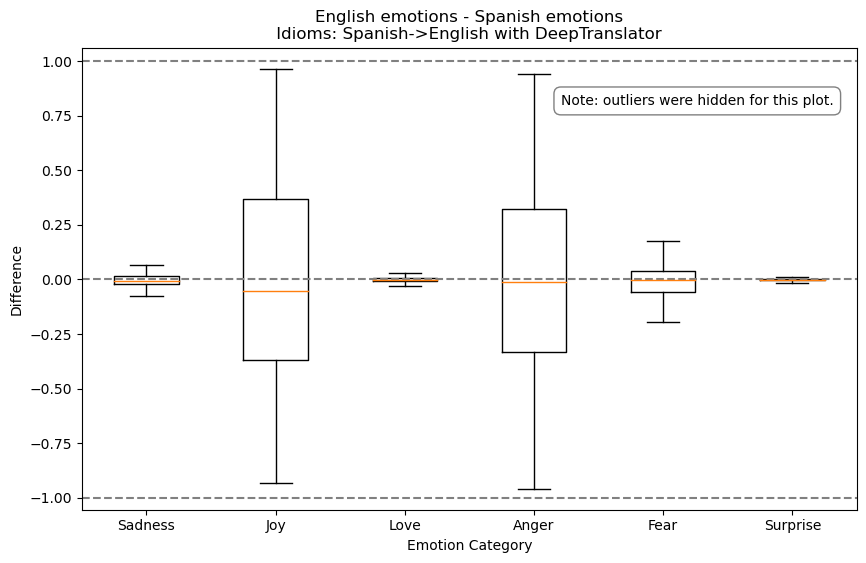

In [13]:
# Create a box plot
plt.figure(figsize=(10, 6))
plt.boxplot(difference, labels=['Sadness', 'Joy', 'Love', 'Anger', 'Fear', 'Surprise'], showfliers=False)
plt.title('English emotions - Spanish emotions\n Idioms: Spanish->English with DeepTranslator ')
plt.xlabel('Emotion Category')
plt.ylabel('Difference')
plt.axhline(0, color='gray', linestyle='--')
plt.axhline(1, color='gray', linestyle='--')
plt.axhline(-1, color='gray', linestyle='--')

plt.text(0.97, 0.90, 'Note: outliers were hidden for this plot.', horizontalalignment='right', verticalalignment='top', transform=plt.gca().transAxes, bbox=dict(facecolor='white', edgecolor='gray', boxstyle='round,pad=0.5'))


plt.show()

## Interestingly, the

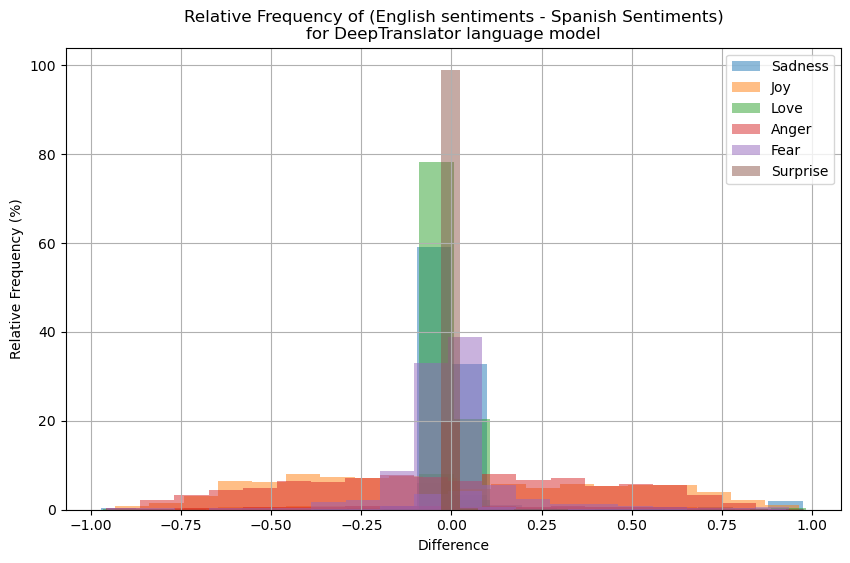

In [125]:
# Create a figure and axis object
fig, ax = plt.subplots(figsize=(10, 6))

# Plot histograms for each sentiment category
legend_handles = []  # To store legend handles
for i, sentiment in enumerate(['Sadness', 'Joy', 'Love', 'Anger', 'Fear', 'Surprise']):
    counts, bins, _ = ax.hist(difference[:, i], bins=20, alpha=0.5, density=True, label=sentiment)
    bin_centers = 0.5 * (bins[:-1] + bins[1:])
    percent = counts / counts.sum() * 100
    bars = ax.bar(bin_centers, percent, width=(bins[1] - bins[0]), alpha=0.5)
    legend_handles.append(bars[0])  # Store only the first bar for each sentiment category

# Add labels and title
ax.set_title('Relative Frequency of (English sentiments - Spanish Sentiments)\nfor DeepTranslator language model')
ax.set_xlabel('Difference')
ax.set_ylabel('Relative Frequency (%)')

# Add legend with single entry for each sentiment category
ax.legend(legend_handles, ['Sadness', 'Joy', 'Love', 'Anger', 'Fear', 'Surprise'])

# Display the plot
plt.grid(True)
plt.show()

# Trying to do more stats with I'm not stoked on the results
Probably just want to drop these cells, but I wasn't sure yet.

In [ ]:
abs_diff_df = pd.DataFrame(abs_difference).rename(columns={0:'Sadness', 1:'Joy', 2:'Love', 3:'Anger', 4:'Fear', 5:'Surprise'})
abs_diff_df

In [ ]:
from scipy.stats import ttest_1samp

sentiments = ['Sadness', 'Joy', 'Love', 'Anger', 'Fear', 'Surprise']
# Perform one-sample t-test for each category
alpha = 0.05  # significance level

for sentiment in sentiments:
    stat, p_value = ttest_1samp(abs_diff_df[sentiment], 0)
    print(f"Sentiment: {sentiment}")
    print(f"Test statistic: {stat}")
    print(f"P-value: {p_value}")
    
    if p_value < alpha:
        print("Null hypothesis rejected: There is evidence that the true absolute difference is not equal to 0.")
    else:
        print("Fail to reject the null hypothesis: There is no evidence that the true absolute difference is not equal to 0.")
    print()